<a href="https://colab.research.google.com/github/kashishthakur26/Data-Science/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score , ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab-notebooks/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.info() , df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(None, (100000, 9))

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.duplicated().sum()

3854

In [12]:
# removing duplicate values
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(96146, 9)

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
columns = ["gender" , "hypertension" , "heart_disease","smoking_history" , "diabetes"]

for col in columns:
  print(col , df[col].unique())

gender ['Female' 'Male' 'Other']
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes [0 1]


In [18]:
df[df['gender']== 'Other'].shape

(18, 9)

In [19]:
df[df['smoking_history'] == "No Info"].shape

(32887, 9)

In [20]:
df[df['smoking_history'] == "former"].shape


(9299, 9)

In [21]:
df[df['smoking_history']== 'not current'].shape

(6367, 9)

### Summary of DataFrame

In [22]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### count of individual by Smoking History

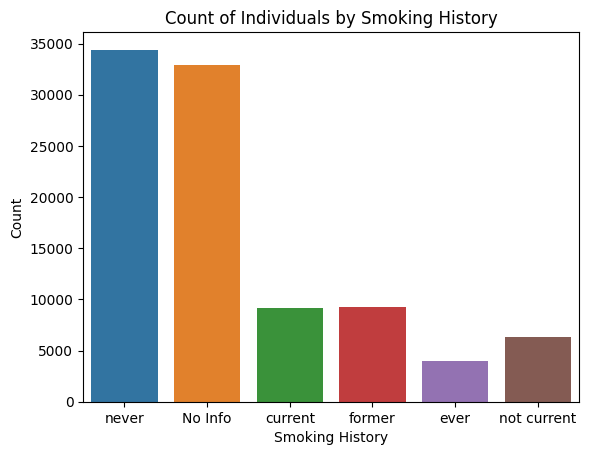

In [25]:
import seaborn as sns

sns.countplot(x='smoking_history', data=df)
plt.title('Count of Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

### Age Distribution

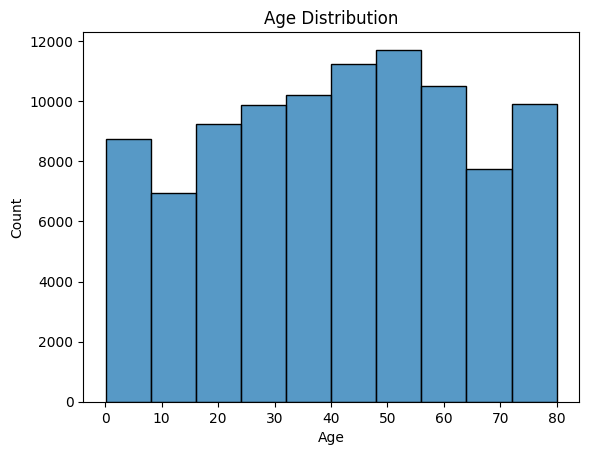

In [27]:
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

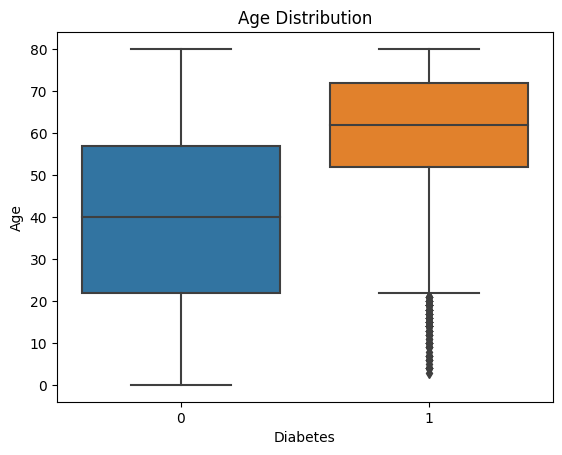

In [28]:

sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title('Age Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

### BMI distribution

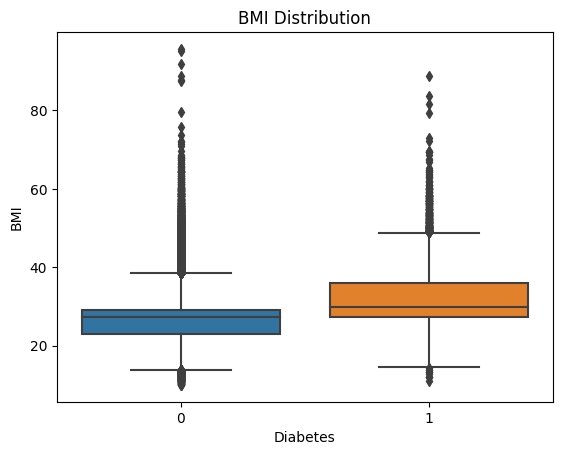

In [29]:

sns.boxplot(x=df['diabetes'], y=df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

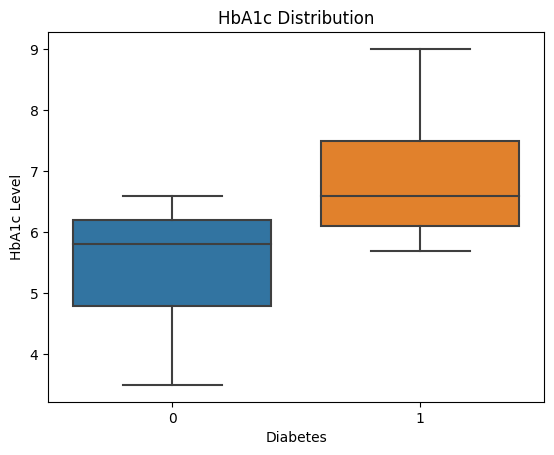

In [30]:
### HbA1c Level distribution

sns.boxplot(x=df['diabetes'] , y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

### Blood Glucose Level Distribution


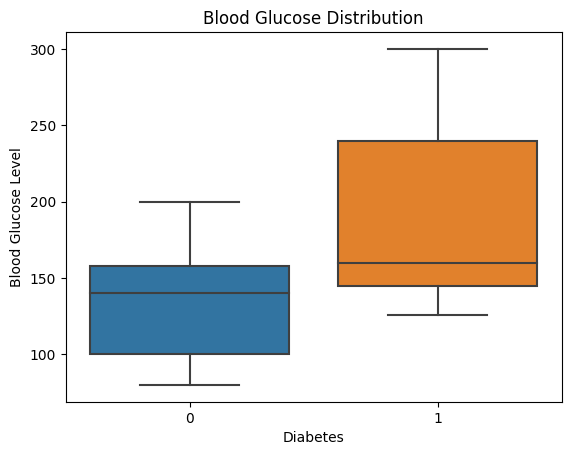

In [31]:
sns.boxplot(x=df['diabetes'] , y=df['blood_glucose_level'])
plt.title('Blood Glucose Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

### Correlation Heatmap

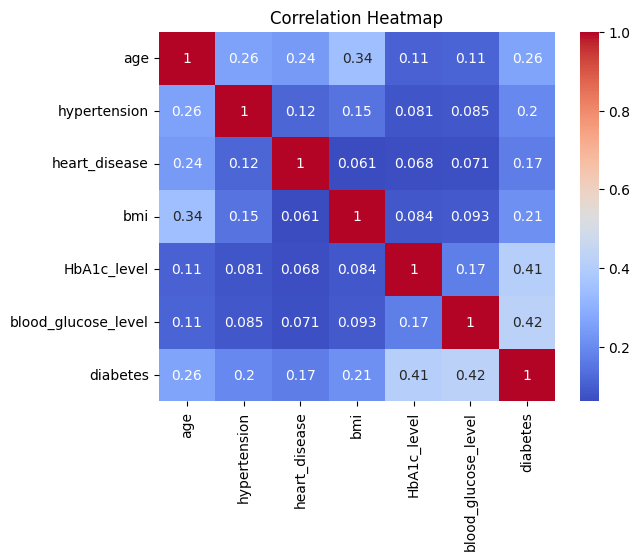

In [32]:
corr = df[['age', 'hypertension', 'heart_disease',
 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


## We have to do one-hot encoding of gender and smoking_history columns

In [35]:
dummy_df  = pd.get_dummies(df[["gender","smoking_history"]] , drop_first=True)
dummy_df.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0


### Concatinating One-hot encoding columns with other columns

In [45]:
df2 = df1.drop("smoking_history",axis=1)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [52]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [53]:
dummy_df  = pd.get_dummies(df[["gender","smoking_history"]] , drop_first=True)
dummy_df.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0


In [66]:
X = pd.concat([df2,dummy_df], axis=1)
X.drop("diabetes", axis=1)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


In [67]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


### Scaling X

In [64]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X[0]

array([1.        , 0.        , 1.        , 0.17717087, 0.56363636,
       0.27272727, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        ])

In [65]:
y = df['diabetes']

In [68]:
y.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

## SMOTE

In [71]:
algos = {
 'logistic_regression': {
 'model': LogisticRegression(),
 'params': {
 'penalty': ['l1', 'l2', 'elasticnet', None]
 }
 },
 'SVM': {
 'model': SVC(),
 'params': {
 }
 },
 'decision_tree': {
 'model': DecisionTreeClassifier(),
 'params': {
 'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best','random']
 }
 },
 'random_forest': {
 'model': RandomForestClassifier(),
 'params': {
 'n_estimators': [1,5,10,20,50],
 'criterion': ['gini', 'entropy', 'log_loss']
 }
 },
 'ada_boost_classifier': {
 'model': AdaBoostClassifier(),
 'params': {
 'n_estimators': [1,5,10,20,50,100]
 }
 },
 'gradient_boosting_classifier': {
 'model': GradientBoostingClassifier(),
 'params': {
 'n_estimators': [1,5,10,20,50,100],
 'loss': ['log_loss', 'deviance', 'exponential']
 }
 },
 'bagging_classifier': {
 'model': BaggingClassifier(),
 'params': {
 'n_estimators': [1,5,10,20,50]
 }
 },
 'gaussian_naive_bayes': {
 'model': GaussianNB(),
 'params': {
 }
 },
 'multinomial_naive_bayes': {
 'model': MultinomialNB(),
 'params': {
 }
 }
}


In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
scores = []
cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=42)

for algo_name , mp in algos.items():
  reg = GridSearchCV(mp['model'],mp['params'] , cv =cv , return_train_score=False)
  reg.fit(X ,y)
  scores.append(
      {
          'model': algo_name,
          'best_score': reg.best_score_,
          'best_params': reg.best_params_
      }
  )


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [76]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,logistic_regression,1.000000,{'penalty': 'l2'}
1,SVM,0.952917,{}
2,decision_tree,1.000000,"{'criterion': 'gini', 'splitter': 'best'}"
3,random_forest,1.000000,"{'criterion': 'gini', 'n_estimators': 5}"
4,ada_boost_classifier,1.000000,{'n_estimators': 1}
5,gradient_boosting_classifier,1.000000,"{'loss': 'log_loss', 'n_estimators': 5}"
6,bagging_classifier,1.000000,{'n_estimators': 1}
7,gaussian_naive_bayes,1.000000,{}
8,multinomial_naive_bayes,0.985169,{}


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from

In [82]:

model = RandomForestClassifier(n_estimators=50, criterion='log_loss')
model.fit(X_train, y_train)

TypeError: ignored

In [83]:

y_pred = model.predict(X_test)

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[17509,     0],
       [    0,  1721]])

In [85]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230

